In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
np.random.seed(2)

In [3]:
data_set = {
    'product_id': range(1,21),
    'product_name': [f'Product {i}' for i in range(1,21)],
    'category': np.random.choice(['Clothing','Electronics','Home Decor','Sports','Lighting'],20),
    'units_sold': np.random.poisson(lam=20,size=20),
    'sale_date': pd.date_range(start='2025-03-17',periods=20,freq='D')
    
}
sales_data = pd.DataFrame(data_set);
sales_data

,product_id,product_name,category,units_sold,sale_date
0,1,Product 1,Clothing,20,2025-03-17
1,2,Product 2,Clothing,12,2025-03-18
2,3,Product 3,Sports,11,2025-03-19
3,4,Product 4,Home Decor,13,2025-03-20
4,5,Product 5,Sports,21,2025-03-21
5,6,Product 6,Clothing,13,2025-03-22
6,7,Product 7,Home Decor,18,2025-03-23
7,8,Product 8,Electronics,16,2025-03-24
8,9,Product 9,Sports,20,2025-03-25
9,10,Product 10,Home Decor,18,2025-03-26


In [6]:
sales_data.to_csv('sales_data.csv',index=False)

# Descriptive Statistics

In [8]:
descriptive_stats = sales_data['units_sold'].describe()
descriptive_stats

count    20.000000
mean     18.350000
std       4.869616
min      11.000000
25%      14.500000
50%      18.500000
75%      21.000000
max      30.000000
Name: units_sold, dtype: float64

In [9]:
# Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()
print('\n Mean Sales = ',mean_sales)
print('\n Median of Sales = ',median_sales)
print('\n Mode of Sales = ',mode_sales)
print('\n Variance of Sales = ',variance_sales)
print('\n Standard deviation in Sales = ',std_deviation_sales)


 Mean Sales =  18.35

 Median of Sales =  18.5

 Mode of Sales =  18

 Variance of Sales =  23.713157894736838

 Standard deviation in Sales =  4.8696157851248225


# Category Data Analysis for 'Units Sold'

In [14]:
category_sales = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index().rename(columns = {'category':'Category','sum':"Sum",'mean':'Mean','std':'Standard Deviation'})
category_sales

,Category,Sum,Mean,Standard Deviation
0,Clothing,45,15.00,4.358899
1,Electronics,31,15.50,0.707107
2,Home Decor,100,20.00,6.284903
3,Lighting,83,20.75,2.500000
4,Sports,108,18.00,5.440588


# Inferential Statistics

# Confidence level 95 % i.e Significance or Error level is 5 %

In [16]:
confidence_level = .95
degrees_freedom = len(sales_data) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

#t score for 95 % confidence level is
t_score = stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval =  (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(16.070949658831786, 20.629050341168217)


# Confidence level 99 % i.e Significance or Error level is 1 %

In [17]:
confidence_level = .99
degrees_freedom = len(sales_data) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

#t score for 99 % confidence level is
t_score = stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval =  (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(15.234787837408295, 21.46521216259171)


# Hypothesis Testing

In [20]:
# Null Hypothesis:- Mean of the Units Sold is 20
# Alternate Hypothesis:- Mean of the Units sold is not equal to 20

print('\nPerforming t-test as sample is small size')
t_statistic,p_value = stats.ttest_1samp(sales_data['units_sold'],20)

print(f"\nt_statistic : {t_statistic}  p_value : {p_value}")

if (p_value < 0.05) :
    print('\nReject Null Hypothesis. Mean Units Sold is not equal to 20')
else :
    print('\nAccept Null Hypothesis. Mean Units Sold is equal to 20')


Performing t-test as sample is small size

t_statistic : -1.5153196168555945  p_value : 0.14615160242318528

Accept Null Hypothesis. Mean Units Sold is equal to 20


# Visualizations

# Distribution Plot

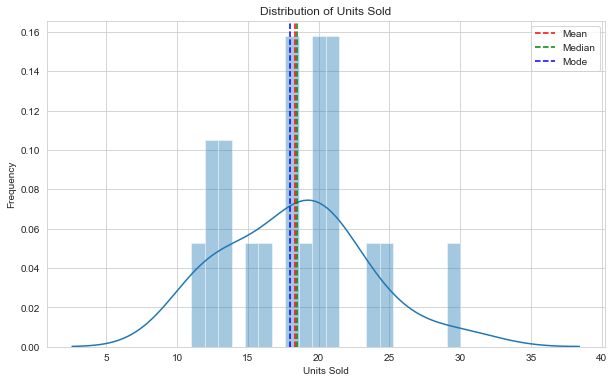

In [28]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.distplot(sales_data['units_sold'], bins=20, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='r',linestyle='--',label='Mean')
plt.axvline(median_sales,color='g',linestyle='--',label='Median')
plt.axvline(mode_sales,color='b',linestyle='--',label='Mode')
plt.legend()
plt.show()

# Box Plot

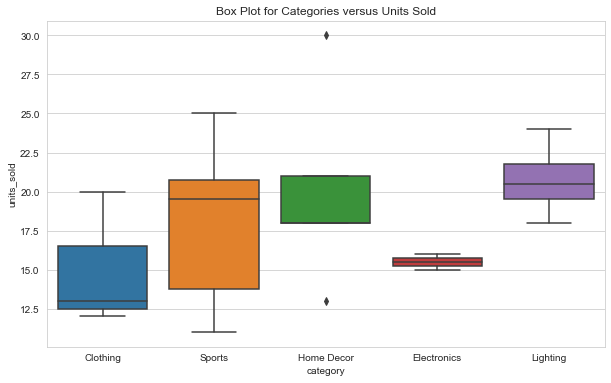

In [31]:
plt.figure(figsize=(10,6))
plt.title('Box Plot for Units Sold per Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
sns.boxplot(x=sales_data['category'], y = sales_data['units_sold'])
plt.show()

# Bar Plot for Units Sold per Category

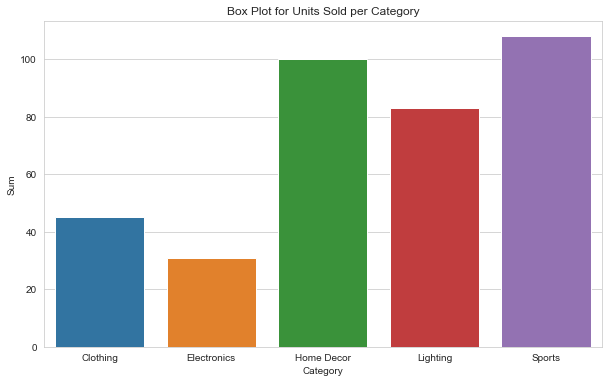

In [35]:
plt.figure(figsize=(10,6))
plt.title('Box Plot for Units Sold per Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
sns.barplot(x='Category', y='Sum', data=category_sales)
plt.show()